In [214]:
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import confusion_matrix, mean_squared_error

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import graphviz

%matplotlib inline

/Users/anaconda/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# Ty,  my question is 'how can I best adapt the following time series data to train a classifier to recognize low standard deviations in order to predict price ratio appreciation ?'

## The most relevant tables from this notebook are: 
1. y (1's and 0's depending upon whether the pairs ratio increased within the qtr (63 days) preceding the indicator
2. pairs_indicator (1's marking where pairs ratios are below -1 st. dev. from historical..a mask or boolean table)
3. pairs_table_z_score (I believe these scores might ultimately be considered as factors) 

## Principal supporting tables:
4. correlation_table
5. closing_price_table

In [97]:
import pandas as pd
EP_List = pd.read_csv("E&P_List.csv", header= 0)
EP_List = EP_List['Symbol']

In [ ]:
from yahoo_finance import Share
from __future__ import division
from datetime import datetime

today = datetime.strftime(datetime.today(), "%Y-%m-%d")

# Setting first time dataframe
prices_table_combined= pd.DataFrame({"date":l_date,"symbol": "DVN", "open" :l_open, "high":l_high,"low":l_low, 
                            "close":l_close,"volume":l_volume})
    
for symbol in EP_List:
    stock = Share(symbol) 
    hist_quotes = stock.get_historical('2016-05-02', today)
    hist_quotes_DVN.reverse()

    l_date = []
    l_open = []
    l_high = []
    l_low = []
    l_close = []
    l_volume = []
    # reverse the list
    hist_quotes.reverse()
    for quotes in hist_quotes:
        l_date.append(quotes['Date'])
        l_open.append(float(quotes['Open']))
        l_high.append(float(quotes['High']))
        l_low.append(float(quotes['Low']))
        l_close.append(float(quotes['Close']))
        l_volume.append(int(quotes['Volume']))


    prices_table= pd.DataFrame({"date":l_date,"symbol": symbol, "open" :l_open, "high":l_high,"low":l_low, 
                                "close":l_close,"volume":l_volume})    
    prices_table_combined = pd.concat([prices_table,prices_table_combined], axis =0)    

In [346]:
type(hist_quotes)

list

In [117]:
#14374/252 = 57 co's
# PIVOTING PRICE TABLE 
#closing_price_table= pd.DataFrame({"close":prices_table_combined['close'],"symbol": prices_table_combined['symbol'],
#                                  "date":prices_table_combined["date"]})
closing_price_table= pd.pivot_table(closing_price_table, values='close', index=["date"], columns=["symbol"])
closing_price_table

symbol,AM,APA,APC,AR,AXAS,BBG,CDEV,CEO,CHK,CLR,...,SWN,SYRG,UNT,USO,VET,VNOM,WLL,WPX,WTI,XEC
date,,,,,,,,,,,,,,,,,,,,,
2016-05-02,24.139999,54.240002,51.950001,27.100000,1.38,7.79,10.100000,123.019997,6.59,38.009998,...,12.80,7.16,12.110000,11.05,33.369999,18.889999,10.79,9.49,2.28,110.349998
2016-05-03,24.260000,52.130001,50.099998,25.850000,1.34,7.05,10.100000,118.989998,5.80,35.930000,...,11.92,6.89,11.390000,10.74,32.270000,18.070000,10.29,8.52,2.16,105.370003
2016-05-04,24.420000,50.730000,47.020000,25.900000,1.29,6.92,10.100000,116.099998,5.65,34.849998,...,11.71,5.95,11.100000,10.79,32.279999,18.129999,10.12,8.42,2.22,106.150002
2016-05-05,24.450001,54.820000,46.099998,25.799999,1.32,7.08,10.000000,117.379997,5.71,39.700001,...,12.16,6.05,10.160000,10.90,33.169998,18.940001,10.43,8.99,2.32,113.680000
2016-05-06,24.639999,53.840000,46.560001,25.900000,1.37,7.08,10.000000,116.410004,4.59,38.790001,...,11.79,5.75,12.250000,10.96,33.020000,18.600000,10.36,8.63,2.37,110.190002
2016-05-09,23.990000,52.119999,44.990002,25.490000,1.33,6.56,10.000000,113.160004,4.10,38.740002,...,11.53,5.60,12.110000,10.68,31.650000,18.500000,10.02,8.21,2.26,110.459999
2016-05-10,24.180000,53.090000,47.009998,26.040001,1.34,7.01,10.000000,117.239998,4.30,40.500000,...,12.36,5.82,13.630000,10.99,32.099998,18.930000,10.78,8.54,2.30,113.190002
2016-05-11,24.400000,54.009998,47.919998,26.020000,1.32,7.08,10.000000,117.209999,4.36,40.160000,...,12.23,5.73,13.490000,11.34,32.669998,18.559999,11.00,8.88,2.33,114.449997
2016-05-12,24.180000,54.299999,48.250000,25.889999,1.36,6.83,10.100000,116.529999,4.17,40.549999,...,11.86,5.81,12.960000,11.45,32.930000,17.650000,10.93,9.02,2.27,115.339996


In [272]:
closing_price_table.corr().head()

symbol,AM,APA,APC,AR,AXAS,BBG,CDEV,CEO,CHK,CLR,...,SPY,SWN,UNT,USO,VET,VNOM,WLL,WPX,WTI,XEC
symbol,,,,,,,,,,,,,,,,,,,,,
AM,1.000000,-0.059887,0.700335,-0.709988,0.759200,-0.428371,0.818755,-0.035896,0.333738,0.201305,...,0.901788,-0.857069,0.829490,-0.019366,0.512683,-0.087018,0.166401,0.630474,0.642770,0.270839
APA,-0.059887,1.000000,0.602666,0.236294,0.451925,0.509135,0.302482,0.749586,0.603193,0.756636,...,-0.178291,0.175474,0.374827,0.430433,0.644313,-0.427924,0.450130,0.544499,-0.052737,0.696660
APC,0.700335,0.602666,1.000000,-0.379157,0.914919,0.000387,0.887343,0.506673,0.747955,0.726444,...,0.620503,-0.489431,0.918814,0.203424,0.891399,-0.437964,0.389725,0.919943,0.457659,0.753132
AR,-0.709988,0.236294,-0.379157,1.000000,-0.550160,0.574443,-0.660186,0.299855,-0.171633,0.042369,...,-0.752320,0.848803,-0.540010,0.363078,-0.242226,0.165817,0.106242,-0.395165,-0.410183,0.078366
AXAS,0.759200,0.451925,0.914919,-0.550160,1.000000,-0.014794,0.914472,0.294649,0.690756,0.550317,...,0.697356,-0.632511,0.944205,0.184771,0.837515,-0.356134,0.450262,0.880082,0.619882,0.628758


In [210]:
#closing_price_table.to_csv('closing_price_table.csv')
import numpy as np

# Did this separately in R
correlation_table= pd.read_csv("Mean_Reversion_Correlation_Table.csv")

In [297]:
mask = correlation_table[correlation_table <1]
pairs_dict = {}
for index, row in mask.iterrows():
    pairs_dict[index] = (row.idxmax())
pairs_dict

{'AM': 'SPY',
 'APA': 'CLR',
 'APC': 'RSPP',
 'AR': 'RRC',
 'AXAS': 'UNT',
 'BBG': 'DNR',
 'CDEV': 'REN',
 'CEO': 'CLR',
 'CHK': 'DVN',
 'CLR': 'XEC',
 'CNQ': 'CLR',
 'COG': 'SWN',
 'CPG': 'OXY',
 'CRC': 'APC',
 'CRZO': 'QEP',
 'CXO': 'DVN',
 'D': 'SGY',
 'DNR': 'BBG',
 'DVN': 'RSPP',
 'HK': 'SE',
 'KOS': 'AXAS',
 'LPI': 'OAS',
 'MRO': 'DVN',
 'MTDR': 'CXO',
 'MUR': 'DNR',
 'NBL': 'PDCE',
 'NFX': 'QEP',
 'OAS': 'UNT',
 'OXY': 'RRC',
 'PDCE': 'VET',
 'PE': 'DVN',
 'PHX': 'OAS',
 'PRAH': 'REN',
 'PXD': 'WPX',
 'QEP': 'CRZO',
 'REI': 'UNT',
 'REN': 'CDEV',
 'RICE': 'SM',
 'RRC': 'OXY',
 'RSPP': 'DVN',
 'SE': 'HK',
 'SGY': 'D',
 'SM': 'CRZO',
 'SN': 'MTDR',
 'SPY': 'AM',
 'SWN': 'RRC',
 'UNT': 'OAS',
 'USO': 'WLL',
 'VET': 'RSPP',
 'VNOM': 'COG',
 'WLL': 'USO',
 'WPX': 'RSPP',
 'WTI': 'SN',
 'XEC': 'CLR'}

In [352]:
normed_closing_price_table = closing_price_table / closing_price_table.iloc[0,:]

In [187]:
del closing_price_table['CWEI']
del closing_price_table['SYRG']
del normed_closing_price_table['CWEI']
del normed_closing_price_table['SYRG']

In [271]:
# Setting up Zeros Filled Table
zeros_data = np.zeros(shape = (len(normed_closing_price_table.index), len(normed_closing_price_table.columns)))
pairs_table= pd.DataFrame(zeros_data, columns=normed_closing_price_table.columns)
pairs_table.index =  normed_closing_price_table.index
pairs_table.head()

symbol,AM,APA,APC,AR,AXAS,BBG,CDEV,CEO,CHK,CLR,...,SPY,SWN,UNT,USO,VET,VNOM,WLL,WPX,WTI,XEC
date,,,,,,,,,,,,,,,,,,,,,
2016-05-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-05-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-05-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-05-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-05-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [281]:
pt_tran= pairs_table.transpose()

In [420]:
# Setting up Zeros Filled Table to Handle Pair Ratios
#pairs_table= pairs_table.iloc[::-1]
for colname in pairs_table.columns:
    pair = pairs_dict[colname]
    pairs_table[colname] = normed_closing_price_table[colname] /normed_closing_price_table[pair] 
pairs_table.tail()    

symbol,AM,APA,APC,AR,AXAS,BBG,CDEV,CEO,CHK,CLR,...,SPY,SWN,UNT,USO,VET,VNOM,WLL,WPX,WTI,XEC
date,,,,,,,,,,,,,,,,,,,,,
2016-05-06,1.031876,0.972665,0.907962,0.992890,0.981408,0.961292,0.859056,0.927241,0.766605,1.022003,...,0.969108,0.956918,1.086318,1.033023,1.002446,1.002430,0.968033,0.921266,1.052586,0.978471
2016-05-05,1.027666,0.967669,0.882269,0.977166,1.140106,0.969280,0.885089,0.913536,0.959776,1.013867,...,0.973079,0.975083,0.892732,1.020473,0.988268,1.004719,0.979938,0.941844,1.068361,0.986323
2016-05-04,1.026205,1.020094,0.948551,0.996218,1.019839,1.049088,0.951613,1.029323,0.946354,0.953141,...,0.974464,0.953610,1.019660,1.041118,1.013773,0.975871,0.960506,0.929843,1.057519,1.049163
2016-05-03,1.013794,1.016737,1.009320,0.984864,1.032396,0.962507,1.017241,1.023235,0.928763,0.989953,...,0.986393,0.961504,1.029067,1.019173,1.012091,0.971012,0.981187,0.939615,1.022648,1.010149
2016-05-02,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [356]:
# Setting up Zeros Filled Table to Handle Pair Ratios Z scores
zeros_data = np.zeros(shape = (len(normed_closing_price_table.index), len(normed_closing_price_table.columns)))
pairs_table_z_score= pd.DataFrame(zeros_data, columns=normed_closing_price_table.columns)
pairs_table_z_score.index =  normed_closing_price_table.index
# Reversing
pairs_table_z_score= pairs_table_z_score.iloc[::-1]
pairs_table_z_score.head()

symbol,AM,APA,APC,AR,AXAS,BBG,CDEV,CEO,CHK,CLR,...,SPY,SWN,UNT,USO,VET,VNOM,WLL,WPX,WTI,XEC
date,,,,,,,,,,,,,,,,,,,,,
2017-05-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-05-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-04-28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-04-27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-04-26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [324]:
i=0
a= (pairs_table['AM'].ix[i:i+63])
a.mean()
#pairs_table_z_score['AM']= pairs_table['AM']/

0.8498469744701443

In [364]:
#252/4 = 63
for symbol in pairs_table_z_score.columns:
    for i in range(round(253*.75)):
        temp_series = pairs_table[symbol].ix[i:i+63]
        temp_series_mean =  temp_series.mean()
        temp_series_std =  temp_series.std()
        temp_series_last_element =  pairs_table[symbol].ix[i]
        pairs_table_z_score[symbol].ix[i] = (temp_series_last_element-temp_series_mean)/temp_series_std

In [439]:
pairs_table_z_score.head()

symbol,AM,APA,APC,AR,AXAS,BBG,CDEV,CEO,CHK,CLR,...,SPY,SWN,UNT,USO,VET,VNOM,WLL,WPX,WTI,XEC
date,,,,,,,,,,,,,,,,,,,,,
2017-05-02,-0.429342,0.348302,-1.661372,-0.383925,-0.510276,-1.669611,-0.650676,1.998124,0.168469,-0.838052,...,0.407728,0.916179,0.864163,0.849184,-0.093683,-1.505397,-0.881712,-1.774768,-0.315130,0.841444
2017-05-01,-0.219965,-0.013019,-1.993818,-0.034676,-0.302926,-1.311019,-0.506228,2.044060,-0.103022,-0.558370,...,0.193521,1.259164,0.897635,0.674949,-0.495412,-1.280150,-0.728462,-1.534132,0.054240,0.545011
2017-04-28,-0.509167,-0.563556,-1.799170,-0.241824,0.043847,-0.932813,0.232309,1.393242,-0.381746,-0.177870,...,0.488695,1.244070,0.171750,1.196142,-0.699713,-0.900589,-1.190950,-1.104295,0.061362,0.150177
2017-04-27,-0.884018,-0.829300,-1.738495,-0.503278,0.559680,-0.765817,0.270374,0.714470,-0.238215,-0.092269,...,0.878005,0.740215,0.305892,0.853055,-1.163055,-1.793467,-0.895472,-0.978673,0.076068,0.062604
2017-04-26,-0.854659,-0.521513,-0.594576,-0.304082,0.196813,-0.938747,0.077115,0.253597,-0.222505,-0.140566,...,0.845748,1.257520,0.878775,1.658073,-1.193658,-1.584181,-1.572920,-0.415629,0.109265,0.111873


In [365]:
pairs_table_z_score.ix[253-62:253]  =np.nan
pairs_table_z_score.tail() 

symbol,AM,APA,APC,AR,AXAS,BBG,CDEV,CEO,CHK,CLR,...,SPY,SWN,UNT,USO,VET,VNOM,WLL,WPX,WTI,XEC
date,,,,,,,,,,,,,,,,,,,,,
2016-05-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-05-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-05-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-05-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-05-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


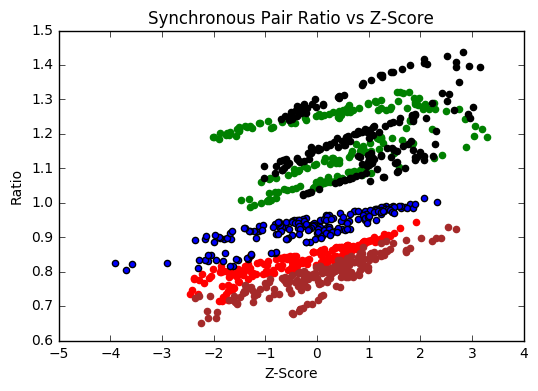

In [455]:
# Select (first 5) Company Pair Ratios vs Z-Scores 
plt.scatter(pairs_table_z_score['AM'], pairs_table['AM'], color="green")
plt.scatter(pairs_table_z_score['APA'], pairs_table['APA'], color="red")
plt.scatter(pairs_table_z_score['APC'], pairs_table['APC'])
plt.scatter(pairs_table_z_score['AR'], pairs_table['AR'], color="black")
plt.scatter(pairs_table_z_score['AXAS'], pairs_table['AXAS'], color="brown")
plt.xlabel("Z-Score")
plt.ylabel("Ratio")
plt.title("Synchronous Pair Ratio vs Z-Score")

In [457]:
# This df is marked with a 1' as indicator for each Z score > threshold to which we then look forward 1 qtr (63 days) to predict appreciation
z_score_threshold= -1
pairs_indicator = pairs_table_z_score[pairs_table_z_score < z_score_threshold]
for index, row in pairs_indicator.iterrows():
    pairs_indicator[pairs_indicator < z_score_threshold] =1
# Num of indicators per symbol
#print(pairs_indicator.sum())
# Num of indicators in total
pairs_indicator.sum().sum()

2386.0

In [460]:
# Checking percent of cells that fall below 1 STD  ... ~ = 1/2 * (1-.68) .... Seems accurate
pairs_indicator.sum().sum()/(55*253)

0.1714696370822853

In [436]:
y = pairs_indicator.copy()
y[0:253] = np.nan
y.head()

symbol,AM,APA,APC,AR,AXAS,BBG,CDEV,CEO,CHK,CLR,...,SPY,SWN,UNT,USO,VET,VNOM,WLL,WPX,WTI,XEC
date,,,,,,,,,,,,,,,,,,,,,
2017-05-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-04-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-04-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-04-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [458]:
# Looking for indicators within the 2nd to 4th quarter's
for col in pairs_indicator.columns:
    for i in range(62, len(pairs_indicator[col])):
        if (pairs_indicator[col].iloc[i] ==1):
            temp_series =pairs_table[col].iloc[i-62:i]
            mean_previous_90 =  (pairs_table[col].iloc[i:i+62]).mean()
            unwind_ratio = pairs_table[col].iloc[i-62]
            setup_ratio = pairs_table[col].iloc[i]
#            print(temp_series)
# Setting y = 1 if, at any point within the subsequent 90, the spread reached the average of previous 90 OR unwind>setup
            if max(temp_series) > mean_previous_90 or unwind_ratio/setup_ratio > 1:
                y[col].iloc[i-62] = 1
            else:
                y[col].iloc[i-62]= 0                

In [462]:
# Verifying that num of y appreciation instances is slightly above 50% ...following seems accurate.
y.sum().sum()/pairs_indicator.sum().sum() 

0.5544844928751048

In [463]:
# 1's and 0's showing up with degree that expected .... 
y.head()

symbol,AM,APA,APC,AR,AXAS,BBG,CDEV,CEO,CHK,CLR,...,SPY,SWN,UNT,USO,VET,VNOM,WLL,WPX,WTI,XEC
date,,,,,,,,,,,,,,,,,,,,,
2017-05-02,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-05-01,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-04-28,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-04-27,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-04-26,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# End of Preparatory Code ... FOLLOWING BEGINS DECISION TREE CLASSIFIER AND IS WIP

In [ ]:
ratio = 0.25 # 75% of training set and 25% of testing set
testing = normed_ratios[0:round(len(normed_ratios)*ratio)]
training = normed_ratios[round(len(normed_ratios)*ratio):]

# WIP
#X_train =
#y_train =
#X_test =
#y_test =

In [ ]:
max_tree_depth = 6
decision_tree = gl.decision_tree_classifier.create(training, validation_set=None, 
                                                   target='outcome', features=l_features, 
                                                   max_depth=max_tree_depth, verbose=False)

In [ ]:
clf = DecisionTreeClassifier(max_depth=6)
clf.fit(X_train, y_train)
clf.score(X_train, y_train)